## Monte Carlo Hit & Miss Integration
 - April 4, 2024

This tutorial will numerically evaluate a definite integral using the Monte Carlo Hit & Miss method.

In [1]:
# Import basic Python modules
import numpy as np
import matplotlib.pyplot as plt

In all Monte Carlo simulations, it is necessary to generate random or pseudo-random numbers.  The Python command ```np.random.uniform()``` from the NumPy module generates random numbers uniformly distributed between zero and one. 

In the cell below, we use this command to generate a single sample.

In [2]:
np.random.uniform()

0.626168801676552

To confirm that the numbers generated are uniformly distribted on the interval $[0, 1]$, we can generate a long list of these numbers and plot a histogram. ```np.random.uniform(a, b, n)``` returns $n$ random numbers uniformly distributed between $a$ and $b$.

In the cell below, we use this command to generate $10^4$ random numbers between $0$ and $1$.

In [3]:
nos = np.random.uniform(0, 1, int(1e4))

Here's a histogram of the $10^4$ uniformly-distributed random numbers.  

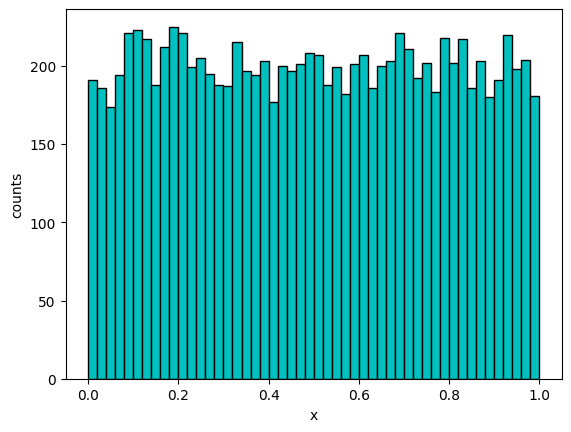

In [4]:
nbins = 50
plt.hist(nos, nbins, color = 'c', edgecolor = 'k')
plt.xlabel('x');
plt.ylabel('counts');

This tutorial will first attempt to evaluate an integral for which the solution is easily obtained.  This approach has been taken purposely so that we can confirm that our numerical techniques are reliable.  The function that we will integrate is a simple polynomial.  Below, the function is plotted on the interval $x = [0, 1]$ and the exact value of the integral is evaluated over the same interval.  We are going to use this polynomial over and over again in this tutorial, so we define it as a function.

In [5]:
fcn = lambda x : (-65536*x**8 + 262144*x**7 - 409600*x**6 + 311296*x**5 - 114688*x**4 + 16384*x**3)/27

Here's a plot of the function over the interval $0\le x\le 1$.

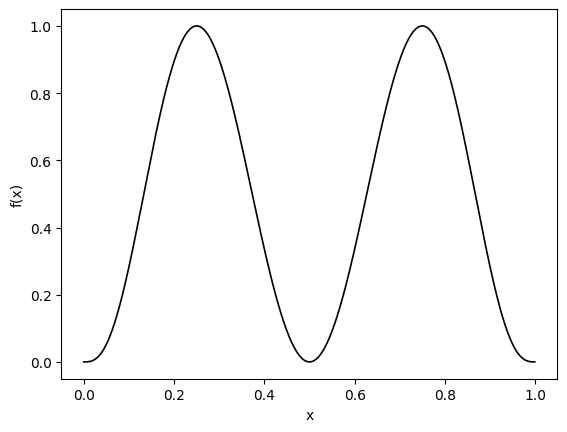

In [6]:
xx = np.arange(0, 1, 0.001)
plt.plot(xx, fcn(xx), 'k-', linewidth = 1.2)
plt.xlabel('x')
plt.ylabel('f(x)');

Here's how we can use the SymPy module to do symbolic integration in Python.  We first need to import the SymPy module.  We can then evaluate the indefinite integral symbolically.

In [7]:
import sympy as sym
x = sym.Symbol('x')
fint = sym.integrate(fcn(x), x)
fint

-65536*x**9/243 + 32768*x**8/27 - 409600*x**7/189 + 155648*x**6/81 - 114688*x**5/135 + 4096*x**4/27

We can also evaluate the definite integram using SymPy.

In [8]:
fint = sym.integrate(fcn(x), (x, 0, 1))
print(fint)
print('The exact value of the integral of f(x) on 0 < x < 1 is', sym.N(fint))

4096/8505
The exact value of the integral of f(x) on 0 < x < 1 is 0.481599059376837


We now implement is the Hit & Miss numerical integration technique.  In this method pairs of random numbers $(x_i, y_i)$ will be generated.  For the $x$-coordinate the $x_i$ values will be between $0$ and $1$ (the integration interval).  Notice that our function of interest always lies between $y = 0..1$.  Therefore, we will also restrict our $y_i$ values to be between $0$ and $1$.  The randomly generated points $(x_i, y_i)$ have equal probability of landing anywhere in the box which has area $1$.  The probability of a point landing beneath the function is equal to the area $A$ beneath the curve (which is just the integral of the function of interest) divided by the area of the box.  Therefore, if we can determine the probability of a point landing beneath the curve, we can easily approximate the value of the definite integral.  The probability will be estimated simply by spraying $n$ points into the box and counting how many land beneath the curve $Z_n$ (i.e. counting the Hits).  Then, the probability $p$ is simply given by $p = Z_n/n$.

In [9]:
n = int(1e4) # Generate 10^4 pairs of (x_i, y_i) values
hits = 0 # Initialize the number of hits to zero
misses = 0 # Initialize the number of misses to zero (it's not necessary to count the misses, but we'll do it anyways.

# Define a set of empty lists to keep track of the coorodinates of the hits and misses 
# (again, not necessary if all you want is the numerical value of the integral)
xH = [] 
yH = []
xM = []
yM = []

# Start the main loop
for i in range(n):
    xx = np.random.uniform() # Generate the x coordinate
    yy = np.random.uniform() # Generate the y coordinate
    if yy <= fcn(xx): # If the randomly-generated y-coorodinate y_i is below the cooresponding value of y = f(x_i), then count a hit  
        hits += 1
        xH = xH + [xx]
        yH = yH + [yy]
    else: # else, count a miss
        misses += 1
        xM = xM + [xx]
        yM = yM + [yy]
intEst = hits/n # Estimate the value of the integral
print('The Hit & Miss estimate of the integral of f(x) on 0 < x < 1 is', intEst)

The Hit & Miss estimate of the integral of f(x) on 0 < x < 1 is 0.4827


Because we tracked the coorodinates of hits and misses, we can plot them!

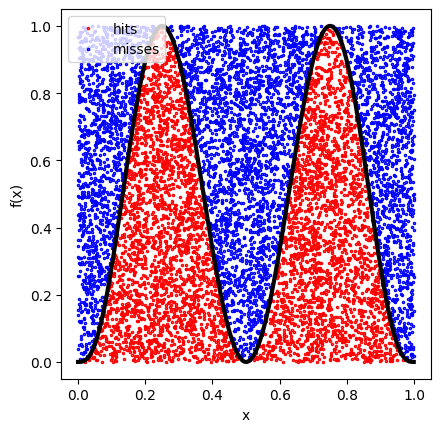

In [10]:
plt.plot(xH, yH, 'ro', fillstyle = 'none', markersize = 1.5, label = "hits") # Scatter plot of the hits (red points)
plt.plot(xM, yM, 'bo', fillstyle = 'none', markersize = 1.5, label = "misses") # Scatter plot of the misses (blue points)
xx = np.arange(0, 1, 0.001)
plt.plot(xx, fcn(xx), 'k-', linewidth = 3) # Line plot of the function (black line)
plt.gca().set_aspect('equal') # Force the plot to be a square
plt.legend(loc="upper left") # Position the legend
plt.xlabel('x')
plt.ylabel('f(x)');

If you don't need to keep track of the actual coordinates of each hit and miss, then you can get away with a more compact loop that just counts the number of hits.

In [11]:
n = int(1e4)
hits = 0
for i in range(n):
    xx = np.random.uniform()
    yy = np.random.uniform()
    if yy <= fcn(xx):
        hits += 1
print('The Hit & Miss estimate of the integral of f(x) on 0 < x < 1 is', hits/n)

The Hit & Miss estimate of the integral of f(x) on 0 < x < 1 is 0.4848


Now, we will numerically approximate the integral using $n = 10^4$ five thousand times and plot the resulting distribution of our determination of the integral.  The distribution is expected to be Gaussian.

To keep track of how long this block of codes takes to complete, we'll use the ```datetime.now()``` function to display the time before and after the loop.

2024-04-05 08:50:52.200455
0%
10%
20%
30%
40%
50%
60%
70%
80%
90%
2024-04-05 08:52:17.478698


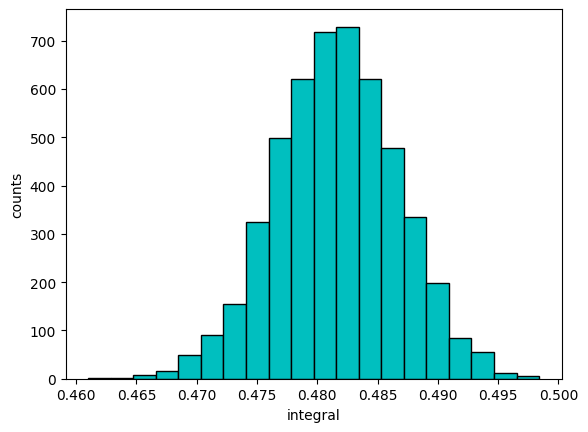

In [30]:
from datetime import datetime # Import the datetime module
print(datetime.now()) # Print the start time

n = int(1e4) 
m = int(5e3)
intList = [] # Prepare an empty list to store the values of the integral estimations
for j in range(m):
    hits = 0 # Initialize hits to zero
    if j % int(m/10) == 0:
        print(int(j/(m/100)), '%', sep = '')
    xx = np.random.uniform(0, 1, n) # Generatre n random x_i values
    yy = np.random.uniform(0, 1, n) # Generatre n random y_i values
    for i in range(n):
        if yy[i] <= fcn(xx[i]): # Check for a hit
            hits += 1
    intList = intList + [hits/n] # Estimate the value of the integral
print(datetime.now()) # Print the end time
nbins = 20
plt.hist(intList, nbins, color = 'c', edgecolor = 'k') # Plot the distribution of values
plt.xlabel('integral')
plt.ylabel('counts');

The width of the distribution can be calculated from the standard deviation of the list of $5000$ approximations of the integral and is an estimate in the uncertainty of our determination of the definite integral.

The standard deviation can be calculated easily using the statistics module.

In [31]:
import statistics
statistics.stdev(intList)

0.005064775980588549

Finally, the last thing we'll attempt to do is to understand how our uncertainly (standard deviation) depends on $n$.  So far, all of our calculations have used $n = 10^4$.  Now we'll determine the standard deviation for values of n that range from $100$ to $10^5$.  This block of code took my laptop over an hour to complete... If you've got a lot time to kill, trying running the same loop in Maple!

In [27]:
print(datetime.now()) # Start time
nList = [100, 200, 500, 1000, 2000, 5000, 1e4, 2e4, 5e4, 1e5] # List of n values to try
m = int(5e3) # Do 5000 iterations for each value of n
sigmaList = []
for k in range(len(nList)): # Loop of the values of n
    intList = [] # Empty list that will be used to store the integral values
    print(k+1, 'of', len(nList)) # Keep track of progress
    n = int(nList[k]) # Select the current value of n
    for j in range(m):
        hits = 0 # Initialize the number of hits
        xx = np.random.uniform(0, 1, n) # Generate n x_i values
        yy = np.random.uniform(0, 1, n) # Generate n y_i values
        for i in range(len(xx)):
            if yy[i] <= fcn(xx[i]): # Test for a hit
                hits += 1
        intList = intList + [hits/n] # Estimate the value of the integral and add it to the list
    sigmaList = sigmaList + [statistics.stdev(intList)] # Find the standard deviation and add it to the list
print(datetime.now()) # End time

2024-04-05 07:55:55.809046
1 of 10
2 of 10
3 of 10
4 of 10
5 of 10
6 of 10
7 of 10
8 of 10
9 of 10
10 of 10
2024-04-05 08:48:48.756214


Below we plot the uncertainty in the numerical integral estimation as a function of $n$ (the number of trials in the Monte Carlo simulation). As expected, the uncertainty decreases as the number of trials increases. The sigma values are proportional to $1/\sqrt{n}$.

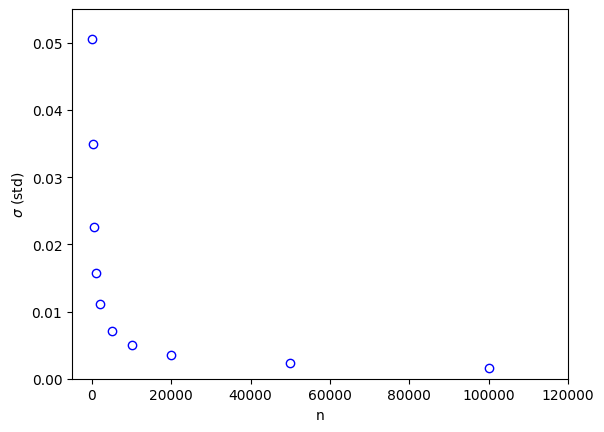

In [28]:
plt.plot(nList, sigmaList, 'bo', fillstyle = 'none')
plt.xlabel('n')
plt.ylabel(r'$\sigma$ (std)')
plt.axis((-5e3, 1.2e5, 0, 0.055));

To get a better appreciation of the dependence of $\sigma$ on $n$, below we plot $\sigma$ as a function of $1/\sqrt{n}$ and observe the linear relationship between the two.  Beautiful!  All of this generated from uniformly distributed random numbers!  Take a moment to reflect on what we've accomplished.  We've used Monte Carlo simulations to study the behaviour of Monte Carlo simulations!  The objective of a Monte Carlo calculation is always to study the characteristics of some system (often a physical system) by simulating data using random numbers.

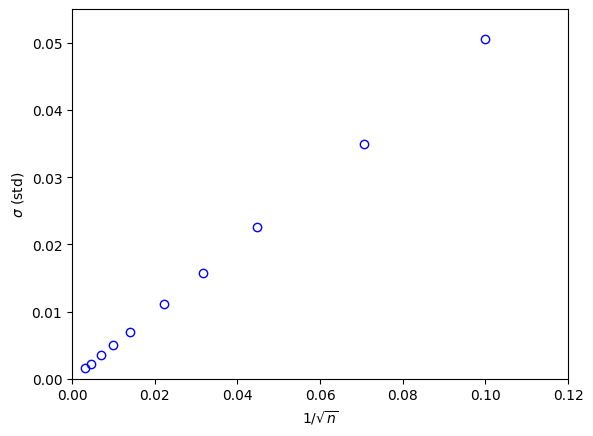

In [29]:
plt.plot(1/np.sqrt(nList), sigmaList, 'bo', fillstyle = 'none')
plt.xlabel(r'$1/\sqrt{n}$')
plt.ylabel(r'$\sigma$ (std)')
plt.axis((0, .12, 0, 0.055));